In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



In [22]:
red_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-red.csv", sep=';')
white_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-white.csv", sep=';')
wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winemerged_data.csv")

In [23]:
wine.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,outliers,quality_category
0,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN,lower quality
1,red wine,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,NaN,lower quality
2,red wine,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,NaN,lower quality
3,red wine,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,NaN,medium quality
4,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN,lower quality


In [24]:
wine.drop(['outliers','quality_category'], axis = 1, inplace=True)

In [25]:
#in original DF was no categories
red_wine['quality_category'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value < 7 else 'high')
white_wine['quality_category'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value < 7 else 'high')

Skewness

In [15]:
skewness= wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('Merged wine', skewness.sort_values())

skewness_rw = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('Red wine', skewness_rw.sort_values())

skewness_ww = white_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('White wine', skewness_ww.sort_values())

'Merged wine'

total sulfur dioxide   -0.001177
pH                      0.386839
citric acid             0.471731
density                 0.503602
alcohol                 0.565718
free sulfur dioxide     1.220066
residual sugar          1.435404
volatile acidity        1.495097
fixed acidity           1.723290
sulphates               1.797270
chlorides               5.399828
dtype: float64

'Red wine'

density                 0.071288
pH                      0.193683
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

'White wine'

total sulfur dioxide    0.390710
pH                      0.457783
alcohol                 0.487342
fixed acidity           0.647751
sulphates               0.977194
density                 0.977773
residual sugar          1.077094
citric acid             1.281920
free sulfur dioxide     1.406745
volatile acidity        1.576980
chlorides               5.023331
dtype: float64

Kurtosis

In [16]:
kurtosis = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display('Merged wine', kurtosis.sort_values())

kurtosis_rw = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display(kurtosis_rw.sort_values())

kurtosis_ww = white_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display(kurtosis_ww.sort_values())


'Merged wine'

alcohol                 -0.531687
total sulfur dioxide    -0.371664
pH                       0.367657
citric acid              2.397239
volatile acidity         2.825372
residual sugar           4.359272
fixed acidity            5.061161
density                  6.606067
free sulfur dioxide      7.906238
sulphates                8.653699
chlorides               50.898051
dtype: float64

citric acid             -0.788998
alcohol                  0.200029
pH                       0.806943
density                  0.934079
fixed acidity            1.132143
volatile acidity         1.225542
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
sulphates               11.720251
residual sugar          28.617595
chlorides               41.715787
dtype: float64

alcohol                 -0.698425
pH                       0.530775
total sulfur dioxide     0.571853
sulphates                1.590930
fixed acidity            2.172178
residual sugar           3.469820
volatile acidity         5.091626
citric acid              6.174901
density                  9.793807
free sulfur dioxide     11.466342
chlorides               37.564600
dtype: float64

One-Hot Encoder for the wine type and the Label Encoder for the quality label.

In [26]:
# One-Hot Encoder "white" will have 0 in the "red" and a 1 in the "white"

OHE = OneHotEncoder()
wine_OHE = OHE.fit_transform(wine[['wine_type']])

wine_OHE_df = pd.DataFrame(wine_OHE.toarray(), columns=OHE.get_feature_names_out(['wine_type']))
wine = pd.concat([wine, wine_OHE_df], axis=1)
#wine_OHE_encoded = wine_OHE.rename(columns={'wine_type_red wine': 'red_wine', 'wine_type_white wine': 'white_wine'})
#wine.drop('wine_type', axis=1, inplace=True)



,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_red wine,wine_type_white wine
0,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0
1,red wine,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0,0.0
2,red wine,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0,0.0
3,red wine,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0,0.0
4,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white wine,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1.0
6493,white wine,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,1.0
6494,white wine,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1.0
6495,white wine,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,1.0


In [ ]:
wine.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_wine_type
0,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,red wine,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,NaN
2,red wine,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,NaN
3,red wine,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,NaN
4,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,NaN


In [ ]:
one_hot = pd.get_dummies(wine['wine_type'])
display(one_hot)

,red wine,white wine
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
6492,False,True
6493,False,True
6494,False,True
6495,False,True


In [ ]:
# another way for One-Hot Encoder (run just one)
wine = pd.get_dummies(wine, columns=['wine_type'], prefix=['wine_type'])

In [ ]:
#in case of mistake
#wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winemerged_data.csv")
#wine.drop(['outliers','quality_category'], axis = 1, inplace=True)

In [ ]:
wine.head()

In [27]:
# Label Encoding for 'quality_category'
label_encoder = LabelEncoder()
red_wine['quality_encoded'] = label_encoder.fit_transform(red_wine['quality_category'])
white_wine['quality_encoded'] = label_encoder.fit_transform(white_wine['quality_category'])

In [30]:
red_wine.head(10)
#do we have to drop  quality_category then as well

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,high,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,high,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,low,1


In [31]:
# wine['wine_type'] = wine['wine_type'].astype('category')
red_wine['quality_category'] = pd.Categorical(red_wine['quality_category'], categories=['low', 'medium', 'high'], ordered=True)
white_wine['quality_category'] = pd.Categorical(white_wine['quality_category'], categories=['low', 'medium', 'high'], ordered=True)

In [32]:
from sklearn.linear_model import LinearRegression
Alcohol = red_wine["alcohol"] 
Volative_acidity = red_wine["volatile acidity"]
Citric_acid = red_wine["citric acid"]
Quality = red_wine["quality_encoded"] 

print(Alcohol.shape)
print(Quality.shape)

(1599,)
(1599,)


In [33]:
# Reshape the dfs to have value for the column instead of a null.
Alcohol = Alcohol.values.reshape(-1, 1)
Volative_acidity = Volative_acidity.values.reshape(-1, 1)
Citric_acid = Citric_acid.values.reshape(-1, 1)
Quality = Quality.values.reshape(-1, 1)

print(Citric_acid.shape)

(1599, 1)


In [34]:
Alcohol_train, Alcohol_test, Quality_train, Quality_test = train_test_split(Alcohol, Quality, test_size=0.2, random_state=27)
print(Alcohol_train)
print(Quality_train)

[[10.1]
 [ 9.5]
 [11.7]
 ...
 [ 9.4]
 [11. ]
 [10.9]]
[[2]
 [1]
 [2]
 ...
 [1]
 [2]
 [0]]


In [35]:
Volative_acidity_train, Volative_acidity_test, Quality_train, Quality_test = train_test_split(Volative_acidity, Quality, test_size=0.2, random_state=27)
print(Quality_train)

[[2]
 [1]
 [2]
 ...
 [1]
 [2]
 [0]]


In [36]:
Citric_acid_train, Citric_acid_test, Quality_train, Quality_test = train_test_split(Citric_acid, Quality, test_size=0.2, random_state=27)

In [37]:
# Train the model 
Alcohol_quality = linear_model.LinearRegression()
Alcohol_quality.fit(Alcohol_train, Quality_train)

LinearRegression()

In [38]:
Volative_acidity_quality = linear_model.LinearRegression()
Volative_acidity_quality.fit(Volative_acidity_train, Quality_train)

LinearRegression()

In [39]:
Citric_acid_quality = linear_model.LinearRegression()
Citric_acid_quality.fit(Citric_acid_train, Quality_train)

LinearRegression()

In [40]:
# Predict values using test data.
Alcohol_quality_score = (Alcohol_quality.score(Alcohol_test, Quality_test) * 100).round(2)
print("The accuracy of the ML model based on Alcohol is:", Alcohol_quality_score , "%")

Volative_acidity_quality_score = (Volative_acidity_quality.score(Volative_acidity_test, Quality_test) * 100).round(2)
print("The accuracy of the ML model based on Volative_acidity is:", Volative_acidity_quality_score , "%")

Citric_acid_quality_score = (Citric_acid_quality.score(Citric_acid_test, Quality_test) * 100).round(2)
print("The accuracy of the ML model based on Citric_acid is:", Citric_acid_quality_score , "%")

The accuracy of the ML model based on Alcohol is: 1.22 %
The accuracy of the ML model based on Volative_acidity is: 0.29 %
The accuracy of the ML model based on Citric_acid is: 0.5 %


In [41]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train, X_test, Y_test):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  # # Using SVC method of svm class to use Support Vector Machine Algorithm
  # from sklearn.svm import SVC
  # svc_lin = SVC(kernel = 'linear', random_state = 0)
  # svc_lin.fit(X_train, Y_train)

  # #Using SVC method of svm class to use Kernel SVM Algorithm
  # from sklearn.svm import SVC
  # svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  # svc_rbf.fit(X_train, Y_train)

  # #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  # from sklearn.naive_bayes import GaussianNB
  # gauss = GaussianNB()
  # gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(X_test, Y_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(X_test, Y_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(X_test, Y_test))
  # print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(Alcohol_test, Price_test))
  # print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(Alcohol_test, Price_test))
  # print('Gaussian Naive Bayes Training Accuracy:', gauss.score(Alcohol_test, Price_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(X_test, Y_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(X_test, Y_test))*100)

In [42]:
models(Alcohol_train, Quality_train, Alcohol_test, Quality_test)

Logistic Regression Training Accuracy: 58.75
Linear Regression Training Accuracy: 1.2226137445249585
K Nearest Neighbor Training Accuracy: 0.521875
Decision Tree Classifier Training Accuracy: 56.25
Random Forest Classifier Training Accuracy: 57.49999999999999


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
models(Volative_acidity_train, Quality_train, Volative_acidity_test, Quality_test)

Logistic Regression Training Accuracy: 49.375
Linear Regression Training Accuracy: 0.2887997988754609
K Nearest Neighbor Training Accuracy: 0.503125
Decision Tree Classifier Training Accuracy: 50.0
Random Forest Classifier Training Accuracy: 51.87500000000001


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
models(Citric_acid_train, Quality_train, Citric_acid_test, Quality_test)

Logistic Regression Training Accuracy: 47.8125
Linear Regression Training Accuracy: 0.500369925676436
K Nearest Neighbor Training Accuracy: 0.4375
Decision Tree Classifier Training Accuracy: 47.1875
Random Forest Classifier Training Accuracy: 46.25


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Multivariative

In [45]:
red_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-red.csv", sep=';')
red_wine['quality_category'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value < 7 else 'high')
red_wine['quality_encoded'] = label_encoder.fit_transform(red_wine['quality_category'])

In [46]:
multivariate_MI = red_wine.drop(['density','fixed acidity', 'quality_category','residual sugar','free sulfur dioxide','pH'],axis='columns')
Quality_Enc = red_wine["quality_encoded"] 
Quality_Enc = Quality_Enc.values.reshape(-1, 1)

print(multivariate_MI.shape)
print(Quality_Enc.shape)

(1599, 8)
(1599, 1)


In [47]:
multivariate_MI

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality,quality_encoded
0,0.700,0.00,0.076,34.0,0.56,9.4,5,1
1,0.880,0.00,0.098,67.0,0.68,9.8,5,1
2,0.760,0.04,0.092,54.0,0.65,9.8,5,1
3,0.280,0.56,0.075,60.0,0.58,9.8,6,2
4,0.700,0.00,0.076,34.0,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,44.0,0.58,10.5,5,1
1595,0.550,0.10,0.062,51.0,0.76,11.2,6,2
1596,0.510,0.13,0.076,40.0,0.75,11.0,6,2
1597,0.645,0.12,0.075,44.0,0.71,10.2,5,1


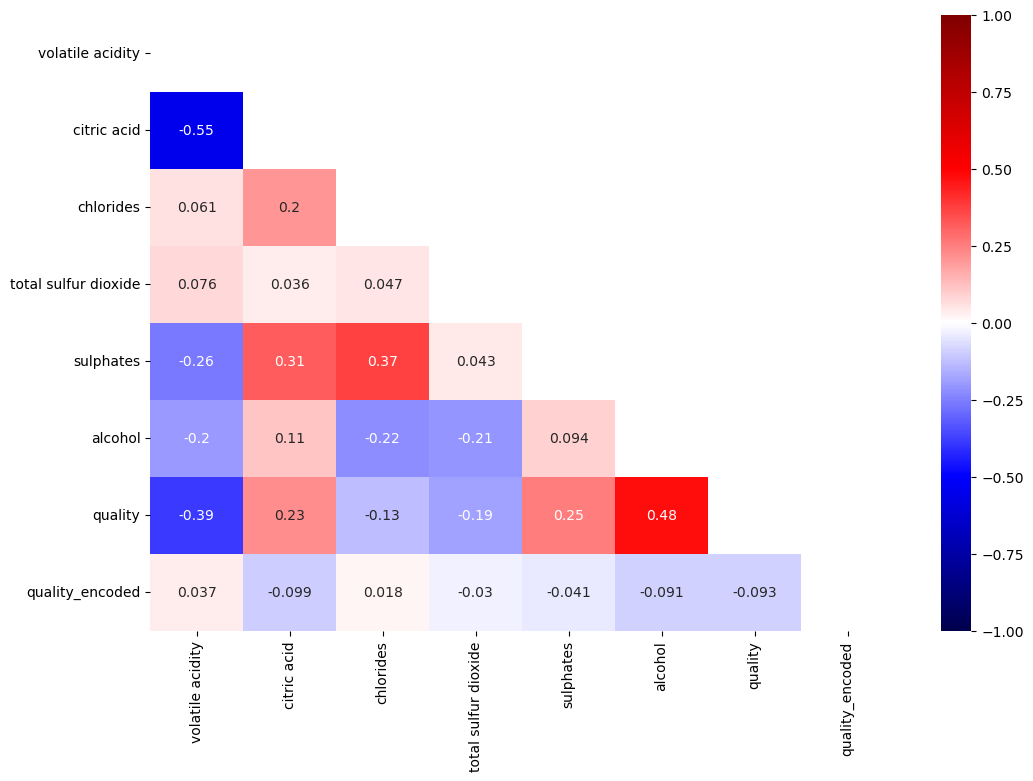

In [48]:
plt.figure(figsize=(12,8))
corr= multivariate_MI.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, cmap='seismic')
plt.show()

In [49]:
multivariate_MI = multivariate_MI.drop(["quality_encoded", 'quality'],axis='columns') 

In [50]:
multivariate_MI

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol
0,0.700,0.00,0.076,34.0,0.56,9.4
1,0.880,0.00,0.098,67.0,0.68,9.8
2,0.760,0.04,0.092,54.0,0.65,9.8
3,0.280,0.56,0.075,60.0,0.58,9.8
4,0.700,0.00,0.076,34.0,0.56,9.4
...,...,...,...,...,...,...
1594,0.600,0.08,0.090,44.0,0.58,10.5
1595,0.550,0.10,0.062,51.0,0.76,11.2
1596,0.510,0.13,0.076,40.0,0.75,11.0
1597,0.645,0.12,0.075,44.0,0.71,10.2


In [51]:
multivariate_01_train, multivariate_01_test, Quality_Enc_train, Quality_Enc_test = train_test_split(multivariate_MI, Quality_Enc, test_size=0.2, random_state=42)

In [52]:
# Train the model 
red_multi_01 = linear_model.LinearRegression()
red_multi_01.fit(multivariate_01_train, Quality_Enc_train)

LinearRegression()

In [53]:
# Predict values using test data.
red_multi_score = (red_multi_01.score(multivariate_01_test, Quality_Enc_test) * 100).round(2)
print("The accuracy of the ML model is:", red_multi_score , "%")

The accuracy of the ML model is: 2.93 %


In [71]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(multivariate_01_test, Quality_Enc_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(multivariate_01_test, Quality_Enc_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(multivariate_01_test, Quality_Enc_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(multivariate_01_test, Quality_Enc_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(multivariate_01_test, Quality_Enc_test))*100)
  
  # return log, tree, forest

In [56]:
models(multivariate_01_train, Quality_Enc_train)

Logistic Regression Training Accuracy: 58.75
Linear Regression Training Accuracy: 2.932161532792976
K Nearest Neighbor Training Accuracy: 0.5375
Decision Tree Classifier Training Accuracy: 65.3125
Random Forest Classifier Training Accuracy: 69.6875


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [58]:
  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(multivariate_01_train, Quality_Enc_train.ravel())
  print('Random Forest Classifier Training Accuracy:', (forest.score(multivariate_01_test, Quality_Enc_test))*100)

Random Forest Classifier Training Accuracy: 69.6875


In [59]:
# Train  using the RandomForestClassifier method
red_multitree = RandomForestClassifier()
red_multitree.fit(multivariate_01_train, Quality_Enc_train)

c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [83]:
quality_mapping = {
    0: "High Quality",
    1: "Medium Quality",
    2: "Low Quality"
}
# Enter the attributes ['volatile acidity	citric acid	chlorides	total sulfur dioxide	sulphates	alcohol']
predictions = [0.58, 0.03, 0.073, 16.0, 0.57, 9.6]

pred_result = red_multitree.predict([predictions]) 
predicted_quality = quality_mapping.get(pred_result[0], "Unknown Quality")

print(f"We probably have Red wine with : {predicted_quality}"
      f"\n Our characteristics are: volatile acidity: {predictions[0]}, citric acid: {predictions[1]}, chlorides: {predictions[2]}  "
      f"\ntotal sulfur dioxide: {predictions[3]}, sulphates: {predictions[4]}, alcohol: {predictions[5]}")

We probably have Red wine with : High Quality
 Our characteristics are: volatile acidity: 0.58, citric acid: 0.03, chlorides: 0.073  
total sulfur dioxide: 16.0, sulphates: 0.57, alcohol: 9.6


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [73]:
red_wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_encoded
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,high,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,high,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,low,1
